In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

%matplotlib inline
sns.set_style('darkgrid')


In [40]:
import pandas as pd

# Load the CSV file with the correct delimiter (comma in this case)
data = pd.read_csv('XAUUSD_historical_data.csv', sep=',')

# Now check the first few rows to verify the data was loaded correctly
print(data.head())

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %H:%M')

# Sort data by date in ascending order
data = data.sort_values('Date')

# Display the first few rows to check the data
print(data.head())


               Date     Open     High      Low    Close  Change(Pips)  \
0  08/30/2024 20:45  2502.56  2503.39  2502.22  2502.98            42   
1  08/30/2024 20:30  2502.37  2502.67  2501.20  2502.32            -5   
2  08/30/2024 20:15  2502.07  2502.69  2502.00  2502.69            62   
3  08/30/2024 20:00  2502.57  2502.89  2501.84  2501.87           -70   
4  08/30/2024 19:45  2501.79  2503.69  2501.20  2502.59            80   

   Change(%)  
0       0.02  
1       0.00  
2       0.02  
3      -0.03  
4       0.03  
                   Date     Open     High      Low    Close  Change(Pips)  \
529 2024-08-23 04:15:00  2493.06  2493.69  2491.70  2492.80           -26   
528 2024-08-23 04:30:00  2492.79  2493.46  2492.50  2493.14            35   
527 2024-08-23 04:45:00  2492.98  2493.58  2492.96  2493.38            40   
526 2024-08-23 05:00:00  2493.34  2495.04  2493.34  2494.43           109   
525 2024-08-23 05:15:00  2494.41  2495.54  2494.29  2494.74            33   

     Cha

In [41]:
# Display the column names to find the correct one
data.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object')

In [42]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %H:%M')

# Sort data by date in ascending order
data = data.sort_values('Date')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Display data info
print("\nDataset Information:")
display(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 530 entries, 2024-08-23 04:15:00 to 2024-08-30 20:45:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          530 non-null    float64
 1   High          530 non-null    float64
 2   Low           530 non-null    float64
 3   Close         530 non-null    float64
 4   Change(Pips)  530 non-null    int64  
 5   Change(%)     530 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 29.0 KB


None

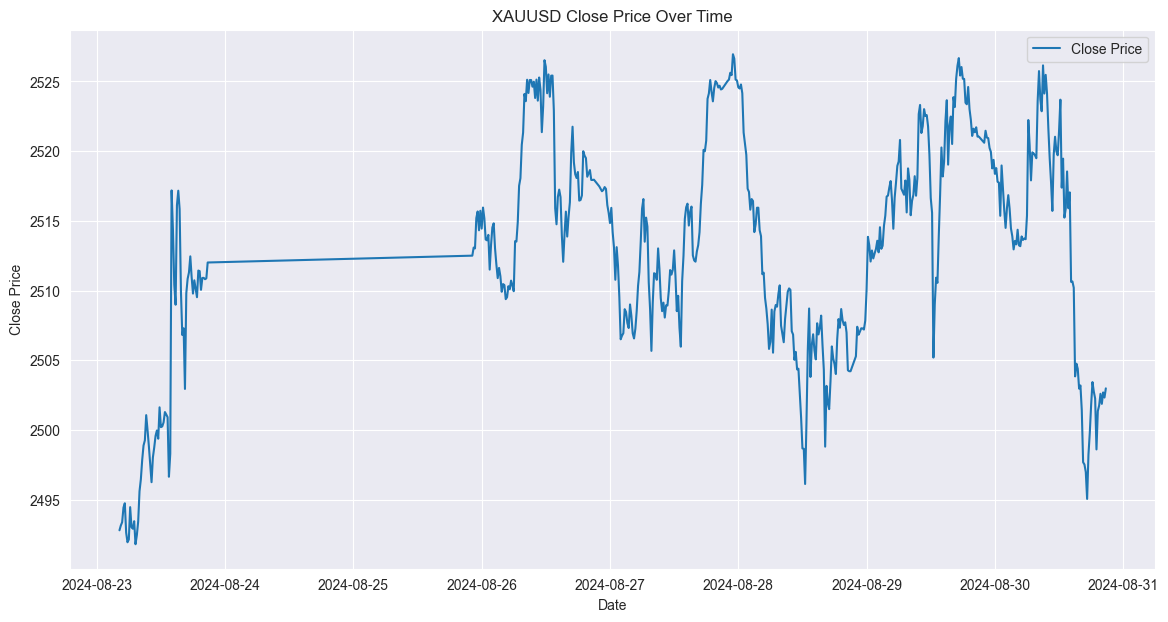

In [43]:
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title('XAUUSD Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


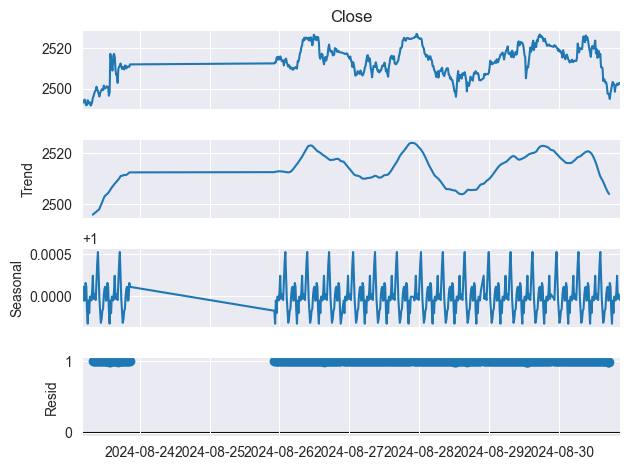

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=30)
decomposition.plot()
plt.show()


In [45]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(data['Close'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')


ADF Statistic: -3.351874877280037
p-value: 0.012713028878677264


In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['Close'], order=(5, 1, 0))  # Example order; tune as needed
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=10)
print(forecast)


d:\finetuning\fine_tuning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\finetuning\fine_tuning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\finetuning\fine_tuning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


530    2502.962263
531    2502.935668
532    2502.918766
533    2502.949430
534    2502.950096
535    2502.946105
536    2502.945220
537    2502.946903
538    2502.947017
539    2502.946690
Name: predicted_mean, dtype: float64


d:\finetuning\fine_tuning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\finetuning\fine_tuning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


20:44:11 - cmdstanpy - INFO - Chain [1] start processing


                 Date     Open     High      Low    Close  Change(Pips)  \
0 2024-08-23 04:15:00  2493.06  2493.69  2491.70  2492.80           -26   
1 2024-08-23 04:30:00  2492.79  2493.46  2492.50  2493.14            35   
2 2024-08-23 04:45:00  2492.98  2493.58  2492.96  2493.38            40   
3 2024-08-23 05:00:00  2493.34  2495.04  2493.34  2494.43           109   
4 2024-08-23 05:15:00  2494.41  2495.54  2494.29  2494.74            33   

   Change(%)  
0      -0.01  
1       0.01  
2       0.02  
3       0.04  
4       0.01  


20:44:11 - cmdstanpy - INFO - Chain [1] done processing
d:\finetuning\fine_tuning\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\finetuning\fine_tuning\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


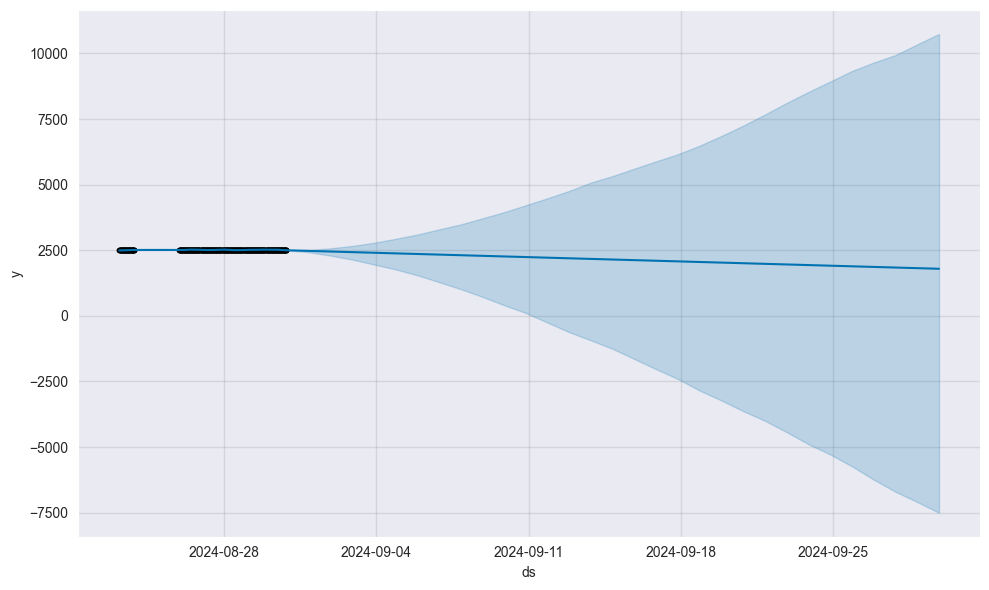

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Reset the index to move the datetime index to a column
data_reset = data.reset_index()
print(data_reset.head())  # Inspect the DataFrame to ensure 'Date' column is present

# Prepare data for Prophet
# Ensure 'Date' is in datetime format
data_reset = data_reset.rename(columns={'index': 'Date'})  # Rename index column to 'Date'
data_reset['Date'] = pd.to_datetime(data_reset['Date'])
prophet_data = data_reset[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(prophet_data)

# Make a future dataframe and predict
future = model.make_future_dataframe(periods=30)  # Predict for 30 days into the future
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.show()


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'y_true' and 'y_pred' are your actual and predicted values
mae = mean_absolute_error(data['Close'], arima_result.fittedvalues)
mse = mean_squared_error(data['Close'], arima_result.fittedvalues)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 6.089640957137647
MSE: 11728.75947381672
RMSE: 108.29939738436553


In [49]:
import joblib

# Save the model
joblib.dump(arima_result, 'arima_model.pkl')

# To load the model later
# model = joblib.load('arima_model.pkl')


['arima_model.pkl']

530    2502.962263
531    2502.935668
532    2502.918766
533    2502.949430
534    2502.950096
535    2502.946105
536    2502.945220
537    2502.946903
538    2502.947017
539    2502.946690
540    2502.946637
541    2502.946740
542    2502.946750
543    2502.946727
544    2502.946723
545    2502.946730
546    2502.946731
547    2502.946729
548    2502.946729
549    2502.946729
550    2502.946729
551    2502.946729
552    2502.946729
553    2502.946729
554    2502.946729
555    2502.946729
556    2502.946729
557    2502.946729
558    2502.946729
559    2502.946729
Name: predicted_mean, dtype: float64


d:\finetuning\fine_tuning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\finetuning\fine_tuning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


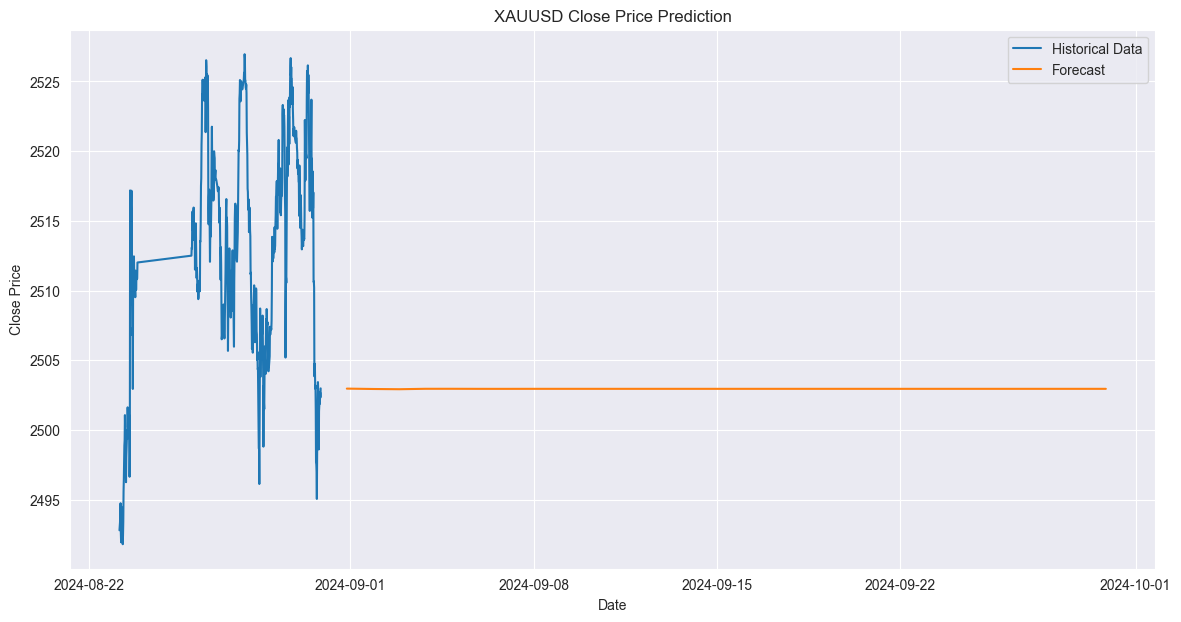

In [50]:
# Forecast future values
future_forecast = arima_result.forecast(steps=30)
print(future_forecast)

# Plot the forecast alongside the historical data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=31, freq='D')[1:], future_forecast, label='Forecast')
plt.title('XAUUSD Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [51]:
from pmdarima import auto_arima

# Automatically find the best parameters
auto_model = auto_arima(data['Close'], seasonal=False, trace=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2263.236, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2263.584, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2265.260, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2265.178, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2261.631, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2264.789, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.847 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  530
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1129.816
Date:                Tue, 03 Sep 2024   AIC                           2261.631
Time:                        20:49:03   BIC                           2265.902
Sample:                             0   HQIC                          2263.303
          

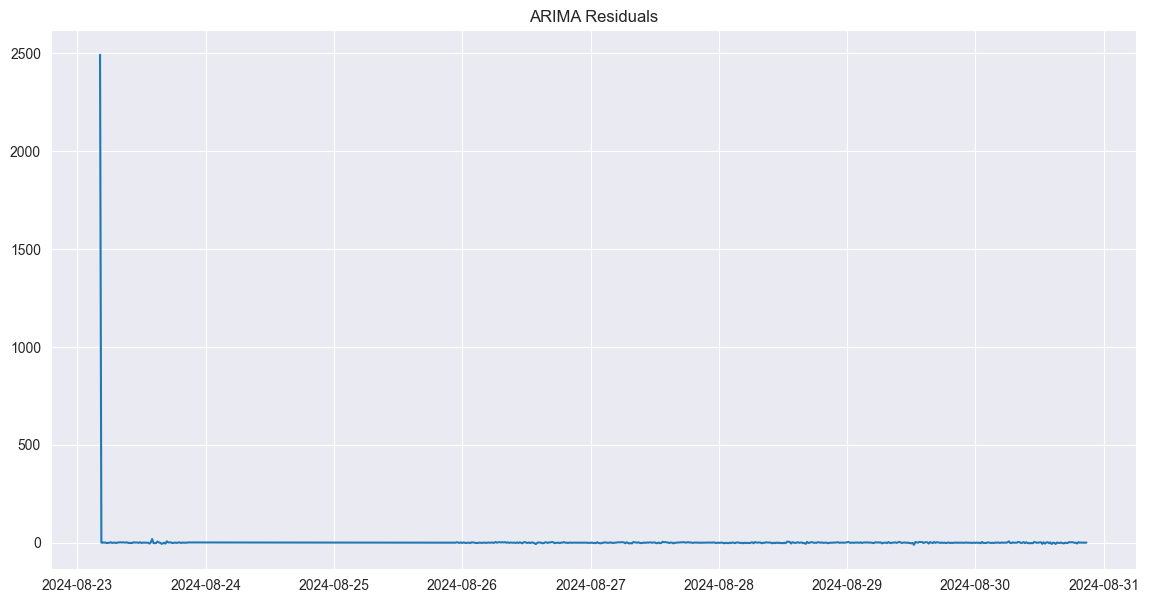

     lb_stat  lb_pvalue
10  0.001097        1.0


In [52]:
residuals = arima_result.resid
plt.figure(figsize=(14, 7))
plt.plot(residuals)
plt.title('ARIMA Residuals')
plt.show()

# Perform Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)


In [53]:
model = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=10.0)
model.fit(prophet_data)


20:49:56 - cmdstanpy - INFO - Chain [1] start processing
20:49:56 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
# Check the length of the dataset
print(f"Number of data points: {len(prophet_data)}")


Number of data points: 530


In [58]:
from prophet.diagnostics import cross_validation

# Adjust horizon and initial based on the dataset size
cv_results = cross_validation(model, horizon='7 days', period='1 day', initial='60 days')
print(cv_results.head())


Error: Less data than horizon after initial window. Make horizon or initial shorter.
